<a href="https://colab.research.google.com/github/janellewashington/janellewashington.github.io/blob/master/JanelleWashingtonDSProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libraries 

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
import numpy as np
import graphviz

from sklearn.pipeline import make_pipeline, Pipeline



from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier


import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error


from sklearn.ensemble import RandomForestRegressor


In [3]:
# Importing tools

import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 112kB 4.9MB/s 
     |████████████████████████████████| 133kB 4.9MB/s 
     |████████████████████████████████| 614kB 27.6MB/s 
     |████████████████████████████████| 235kB 35.4MB/s 
     |████████████████████████████████| 307kB 36.1MB/s 
     |████████████████████████████████| 215kB 39.0MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 737kB 43.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=411d0b5b16d88a7904299bc377a232753424b754238b9cfaf31247cd0a2ff6d4
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=d70c7f92ba991905e31333bd1b8a520f9a48b5f1f53e47df5ce412452dda54d4
  Stored in

     |████████████████████████████████| 57.7MB 36kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=c77022cf6cca842c86814609dff46a278cab4f261a00bc1a592fc3ace79d3f3e
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 266kB 4.8MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376819 sha256=e756d6771df76cc079aa7f105e9debc0988493e6a6eb6133aa6541469ef8a658
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [4]:
# TensorFlow 

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
# Uploading dataset

from google.colab import files
uploaded = files.upload()

Saving NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv to NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv


In [7]:
# Checking folder

! ls

NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv
sample_data


In [0]:
# Loading dataset

df = pd.read_csv ('NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv')

In [0]:
# Treating missing values in dataset

df2 = df.fillna(method = "ffill")

In [10]:
# Checking for missing values in dataset

df2.isnull().sum()

Year                                 0
Cause of Death                       0
State                                0
State FIPS Code                      0
HHS Region                           0
Age Range                            0
Benchmark                            0
Locality                             0
Observed Deaths                      0
Population                           0
Expected Deaths                      0
Potentially Excess Deaths            0
Percent Potentially Excess Deaths    0
dtype: int64

In [0]:
# Changing floats to intergers

float_col = df2.select_dtypes(include = ['float64']) 
for col in float_col.columns.values:
    df2[col] = df2[col].astype('int64')

In [0]:
# Encoding variables

import category_encoders as ce
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    StandardScaler()
)



In [13]:
# Checking dataframe 

type(df)

pandas.core.frame.DataFrame

In [14]:
# Checking dataframe 

type(df2)

pandas.core.frame.DataFrame

In [15]:
# Looking at types of data

df.dtypes

Year                                   int64
Cause of Death                        object
State                                 object
State FIPS Code                       object
HHS Region                             int64
Age Range                             object
Benchmark                             object
Locality                              object
Observed Deaths                      float64
Population                           float64
Expected Deaths                      float64
Potentially Excess Deaths            float64
Percent Potentially Excess Deaths    float64
dtype: object

In [16]:
# Comparing types of data

df2.dtypes

Year                                  int64
Cause of Death                       object
State                                object
State FIPS Code                      object
HHS Region                            int64
Age Range                            object
Benchmark                            object
Locality                             object
Observed Deaths                       int64
Population                            int64
Expected Deaths                       int64
Potentially Excess Deaths             int64
Percent Potentially Excess Deaths     int64
dtype: object

In [17]:
# Looking at data shape

df2.shape

(205920, 13)

In [18]:
# Looking at dataset heading

df2.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756,3148377,451,305,40
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556,2379871,341,217,39
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200,768506,111,89,44
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756,3148377,421,335,44
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556,2379871,318,238,42


In [19]:
# Looking at summary statistics for dataset

df.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
count,205920.000000,205920.000000,195708.000000,2.006400e+05,195708.000000,195708.000000,195708.000000
mean,2010.000000,5.230769,2974.568490,7.008421e+06,2112.863092,875.121043,35.728369
std,3.162285,2.798464,17164.665931,2.861818e+07,13291.617895,4410.206402,18.810895
min,2005.000000,0.000000,10.000000,5.553600e+04,2.000000,0.000000,0.000000
25%,2007.000000,3.000000,155.000000,6.828258e+05,92.000000,41.000000,20.900000
50%,2010.000000,5.000000,508.000000,1.610936e+06,298.000000,159.000000,35.800000
75%,2013.000000,8.000000,1586.000000,4.681585e+06,1019.000000,543.000000,50.100000
max,2015.000000,10.000000,493526.000000,3.151317e+08,465126.000000,175703.000000,85.300000


In [20]:
# Comparing summary statistics for dataset

df2.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
count,205920.000000,205920.000000,205920.000000,2.059200e+05,205920.000000,205920.000000,205920.000000
mean,2010.000000,5.230769,2856.455900,6.894221e+06,2030.354968,839.081260,35.018153
std,3.162285,2.798464,16745.353063,2.827468e+07,12966.146172,4303.196511,18.772609
min,2005.000000,0.000000,10.000000,5.553600e+04,2.000000,0.000000,0.000000
25%,2007.000000,3.000000,145.000000,6.787578e+05,87.000000,38.000000,20.000000
50%,2010.000000,5.000000,481.000000,1.566749e+06,282.000000,150.000000,35.000000
75%,2013.000000,8.000000,1510.000000,4.681102e+06,978.000000,515.000000,50.000000
max,2015.000000,10.000000,493526.000000,3.151317e+08,465126.000000,175703.000000,85.000000


In [21]:
# Looking at target variable

df['Percent Potentially Excess Deaths'].count

<bound method Series.count of 0         40.3
1         39.0
2         44.5
3         44.3
4         42.8
          ... 
205915    61.3
205916    68.3
205917    61.1
205918    54.8
205919    62.9
Name: Percent Potentially Excess Deaths, Length: 205920, dtype: float64>

In [22]:
df['Percent Potentially Excess Deaths'].value_counts()

0.0     2492
50.0    1034
33.3     874
25.0     678
40.0     671
        ... 
85.3       1
82.5       1
84.2       1
83.5       1
85.0       1
Name: Percent Potentially Excess Deaths, Length: 840, dtype: int64

In [0]:
df['ExcessDeathsCategories'] = pd.cut(df['Percent Potentially Excess Deaths'], bins=10)

In [24]:
df['ExcessDeathsCategories']

0         (34.12, 42.65]
1         (34.12, 42.65]
2         (42.65, 51.18]
3         (42.65, 51.18]
4         (42.65, 51.18]
               ...      
205915    (59.71, 68.24]
205916    (68.24, 76.77]
205917    (59.71, 68.24]
205918    (51.18, 59.71]
205919    (59.71, 68.24]
Name: ExcessDeathsCategories, Length: 205920, dtype: category
Categories (10, interval[float64]): [(-0.0853, 8.53] < (8.53, 17.06] < (17.06, 25.59] < (25.59, 34.12] <
                                     ... < (51.18, 59.71] < (59.71, 68.24] <
                                     (68.24, 76.77] < (76.77, 85.3]]

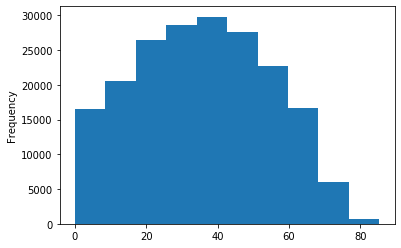

In [25]:
# Histogram of target variable

df['Percent Potentially Excess Deaths'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1091d26160>]],
      dtype=object)

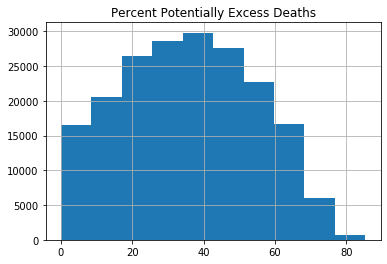

In [26]:
 df.hist(column= 'Percent Potentially Excess Deaths')

In [27]:
# Looking at dataset grouped by state

df.sort_values('Cause of Death')

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,ExcessDeathsCategories
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3,"(34.12, 42.65]"
167858,2014,Cancer,Florida,FL,4,0-49,Floating,Metropolitan,1939.0,11672315.0,1360.0,579.0,29.9,"(25.59, 34.12]"
167783,2014,Cancer,Florida,FL,4,0-49,Floating,All,2037.0,12098065.0,1410.0,627.0,30.8,"(25.59, 34.12]"
166984,2014,Cancer,Idaho,ID,10,0-69,2010 Fixed,All,1142.0,1481100.0,1040.0,114.0,10.0,"(8.53, 17.06]"
166871,2014,Cancer,Hawaii,HI,9,0-64,2010 Fixed,All,730.0,1191407.0,627.0,108.0,14.8,"(8.53, 17.06]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128542,2011,Unintentional Injury,Kentucky,KY,4,0-54,2010 Fixed,Metropolitan,740.0,1897569.0,315.0,425.0,57.4,"(51.18, 59.71]"
128541,2011,Unintentional Injury,Kentucky,KY,4,0-54,2010 Fixed,All,1693.0,3217037.0,536.0,1157.0,68.3,"(68.24, 76.77]"
128540,2011,Unintentional Injury,Kentucky,KY,4,0-54,2005 Fixed,Nonmetropolitan,953.0,1319468.0,209.0,744.0,78.1,"(76.77, 85.3]"
128598,2011,Unintentional Injury,Kentucky,KY,4,0-84,Floating,All,2364.0,4297883.0,921.0,1443.0,61.0,"(59.71, 68.24]"


In [28]:
df.groupby('State')['Percent Potentially Excess Deaths'].value_counts().unstack().fillna(0)


Percent Potentially Excess Deaths,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,80.0,80.1,80.2,80.3,80.4,80.5,80.6,80.7,80.8,80.9,81.0,81.1,81.2,81.3,81.4,81.5,81.6,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.6,82.8,82.9,83.0,83.2,83.3,83.5,83.7,83.8,84.0,84.2,84.3,85.0,85.3
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alaska,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,1.0,5.0,2.0,0.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,4.0,2.0,2.0,6.0,6.0,2.0,2.0,3.0,2.0,1.0,5.0,3.0,3.0,9.0,6.0,4.0,5.0,10.0,4.0,6.0,9.0,5.0,4.0,1.0,3.0,3.0,7.0,5.0,...,5.0,1.0,3.0,1.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,4.0,1.0,4.0,6.0,3.0,5.0,5.0,5.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
California,22.0,0.0,0.0,3.0,3.0,5.0,1.0,3.0,5.0,2.0,3.0,4.0,5.0,7.0,3.0,6.0,4.0,5.0,3.0,5.0,3.0,7.0,5.0,5.0,6.0,5.0,3.0,5.0,3.0,2.0,5.0,4.0,4.0,10.0,8.0,8.0,5.0,5.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colorado,157.0,27.0,21.0,29.0,20.0,29.0,27.0,20.0,25.0,28.0,26.0,22.0,16.0,18.0,19.0,21.0,17.0,20.0,22.0,19.0,11.0,15.0,17.0,25.0,19.0,24.0,12.0,18.0,17.0,21.0,21.0,13.0,12.0,10.0,16.0,7.0,20.0,21.0,16.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Connecticut,169.0,17.0,15.0,12.0,13.0,14.0,3.0,8.0,11.0,9.0,9.0,6.0,10.0,7.0,8.0,14.0,10.0,5.0,5.0,10.0,12.0,14.0,13.0,8.0,8.0,15.0,13.0,15.0,8.0,11.0,11.0,10.0,10.0,12.0,11.0,8.0,11.0,12.0,5.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Delaware,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
District of\nColumbia,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Looking at number of cause of death by disease 

df['Cause of Death'].value_counts()

Heart Disease                        41184
Unintentional Injury                 41184
Stroke                               41184
Cancer                               41184
Chronic Lower Respiratory Disease    41184
Name: Cause of Death, dtype: int64

In [30]:
df[['Cause of Death']].count()

Cause of Death    205920
dtype: int64

In [0]:
dfsee = df.groupby('Cause of Death')['Percent Potentially Excess Deaths'].nunique()

In [32]:
dfsee

Cause of Death
Cancer                               548
Chronic Lower Respiratory Disease    837
Heart Disease                        760
Stroke                               788
Unintentional Injury                 823
Name: Percent Potentially Excess Deaths, dtype: int64

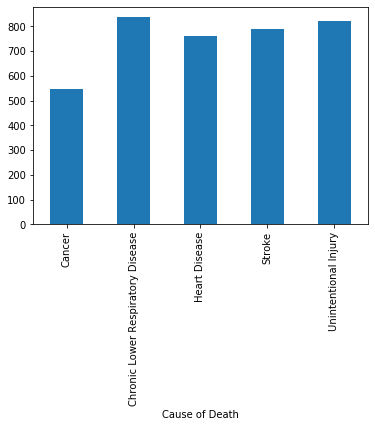

In [33]:
# Looking at cause of death vs percentage of potentially excess deaths

df.groupby('Cause of Death')['Percent Potentially Excess Deaths'].nunique().plot(kind='bar')
plt.show()


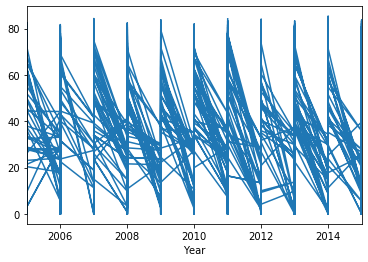

In [34]:
# Looking at year vs percentage of potentially excess deaths

df.set_index('Year')['Percent Potentially Excess Deaths'].plot();

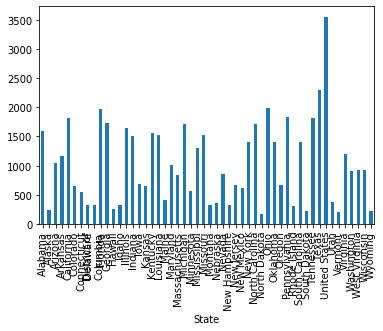

In [35]:
df.groupby('State')['Potentially Excess Deaths'].nunique().plot(kind='bar')
plt.show()


In [0]:
### MODELS

In [0]:
# Spliting dataset into training set and test set by year

In [38]:
# Training set is 2012 and earlier

Train = df2.loc[df2['Year'] < 2013]

Train.shape

(149760, 13)

In [39]:
# Test set is 2013 and later

Test = df2.loc[df2['Year'] > 2012]

Test.shape

(56160, 13)

In [0]:
# The target variable is 'Percent Potentially Excess Deaths' and the features are every other variable 

target = 'Percent Potentially Excess Deaths'
features = df2.columns.drop('Percent Potentially Excess Deaths')

x = Train.drop(columns=target)
y = Train['Percent Potentially Excess Deaths']

xtrain = Train[features]
ytrain = Train[target]

#X_test
xtest = Test[features]
ytest = Test[target]



In [41]:
# Looking at categorical variables

Train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Benchmark,149760,3,Floating,49920
Locality,149760,3,Nonmetropolitan,49920
Cause of Death,149760,5,Heart Disease,29952
Age Range,149760,8,0-69,18720
State,149760,52,Maine,2880
State FIPS Code,149760,52,CA,2880


In [42]:
# Encoding categorical variables

encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain_encoded = encoder.fit_transform(xtrain)
xtest_encoded = encoder.transform(xtest)

xtrain_encoded.head()

,Year,Cause of Death_Cancer,Cause of Death_Chronic Lower Respiratory Disease,Cause of Death_Heart Disease,Cause of Death_Stroke,Cause of Death_Unintentional Injury,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of\nColumbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,...,State FIPS Code_NM,State FIPS Code_NY,State FIPS Code_NC,State FIPS Code_ND,State FIPS Code_OH,State FIPS Code_OK,State FIPS Code_OR,State FIPS Code_PA,State FIPS Code_RI,State FIPS Code_SC,State FIPS Code_SD,State FIPS Code_TN,State FIPS Code_TX,State FIPS Code_0,State FIPS Code_UT,State FIPS Code_VT,State FIPS Code_VA,State FIPS Code_WA,State FIPS Code_WV,State FIPS Code_WI,State FIPS Code_WY,HHS Region,Age Range_0-49,Age Range_0-54,Age Range_0-59,Age Range_0-64,Age Range_0-69,Age Range_0-74,Age Range_0-79,Age Range_0-84,Benchmark_2005 Fixed,Benchmark_2010 Fixed,Benchmark_Floating,Locality_All,Locality_Metropolitan,Locality_Nonmetropolitan,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths
0,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,756,3148377,451,305
1,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,556,2379871,341,217
2,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,200,768506,111,89
3,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,756,3148377,421,335
4,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,556,2379871,318,238


In [43]:
processor.fit_transform(xtrain)

array([[-1.52752523, -1.41421356, -1.69905634, ..., -0.13179387,
        -0.12168346, -0.12452954],
       [-1.52752523, -1.41421356, -1.69905634, ..., -0.15922338,
        -0.13041747, -0.14452649],
       [-1.52752523, -1.41421356, -1.69905634, ..., -0.2167362 ,
        -0.1486795 , -0.17361296],
       ...,
       [ 1.52752523,  1.41421356,  1.69905634, ..., -0.22392154,
        -0.1475679 , -0.15997868],
       [ 1.52752523,  1.41421356,  1.69905634, ..., -0.23809486,
        -0.15447571, -0.18406592],
       [ 1.52752523,  1.41421356,  1.69905634, ..., -0.22999239,
        -0.15050571, -0.16997716]])

In [0]:
# Looking at distribution of target variable 

In [45]:
y.nunique()

85

In [46]:
y.value_counts(normalize=True)

41    0.019485
36    0.019411
37    0.019291
40    0.019237
0     0.019204
        ...   
79    0.000287
80    0.000260
82    0.000120
84    0.000047
83    0.000033
Name: Percent Potentially Excess Deaths, Length: 85, dtype: float64

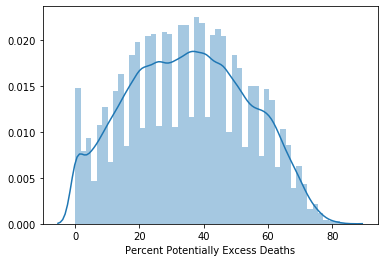

In [47]:
%matplotlib inline
sns.distplot(y);

In [48]:
y.describe()

count    149760.000000
mean         35.232425
std          18.363812
min           0.000000
25%          21.000000
50%          35.000000
75%          49.000000
max          84.000000
Name: Percent Potentially Excess Deaths, dtype: float64

In [49]:
(y < 100).value_counts()

True    149760
Name: Percent Potentially Excess Deaths, dtype: int64

In [0]:
## (Mutliple) Linear Regression

In [51]:
# BASELINE

guess = df2['Percent Potentially Excess Deaths'].mean()
errors = guess - df2['Percent Potentially Excess Deaths']
mae = errors.abs().mean()
print(f'If we just guessed percentage of excessive death is {guess:,.0f}%,')
print(f'we would be off by {mae:,.0f}% on average.')

If we just guessed percentage of excessive death is 35%,
we would be off by 16% on average.


In [0]:
# Selecting model
model = LinearRegression()

In [53]:
# Fitting model
model.fit(xtrain_encoded, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Intercept and coefficients of model

model.intercept_, model.coef_

(-336789.6867272189,
 array([-5.32156095e-01,  3.40215290e+05,  3.40234033e+05,  3.40225470e+05,
         3.40227544e+05,  3.40239274e+05,  2.14944396e+04,  9.28519830e+04,
         2.24314649e+04,  5.37763030e+03, -1.40622724e+04,  2.49953338e+04,
         2.57714037e+04, -6.36900199e+02,  2.10274097e+03,  2.78301080e+03,
         3.42383987e+03,  5.85793348e+03,  6.63998696e+03,  2.73673924e+03,
         2.74251226e+03,  4.29409827e+03,  4.29999857e+03,  1.96487426e+03,
         3.52951556e+03, -3.87034422e+02,  1.17158228e+03, -3.95773640e+02,
         2.73873808e+03,  2.72949970e+03,  1.97149227e+03,  4.30731867e+03,
         5.07939602e+03,  4.29541490e+03,  5.86404930e+03, -3.93014956e+02,
         3.86470608e+02,  3.51688733e+03,  3.89040944e+02,  1.96106922e+03,
         5.07565148e+03,  2.74124476e+03,  3.52814090e+03,  6.63941184e+03,
         1.17601165e+03, -3.90897123e+02,  1.96487442e+03,  5.07797987e+03,
         1.96560932e+03,  3.52071740e+03, -1.16182259e+03,  5.07230

In [0]:
# Predicted target variable based on model

y_predicted = model.predict(xtest_encoded)

In [56]:
# The model has an average error of 9% (which is better than baseline of 16%)

testerror = mean_absolute_error(ytest, y_predicted)
testerror

9.339115602735736

In [0]:
linear_r2 = r2_score(ytest, y_predicted)

In [97]:
linear_r2

0.6419595387500148

In [57]:
# Checking target of test set

type(ytest)

pandas.core.series.Series

In [58]:
# Testing model by choosing random x value

row = xtest_encoded.iloc[[6]]
row

,Year,Cause of Death_Cancer,Cause of Death_Chronic Lower Respiratory Disease,Cause of Death_Heart Disease,Cause of Death_Stroke,Cause of Death_Unintentional Injury,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of\nColumbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,...,State FIPS Code_NM,State FIPS Code_NY,State FIPS Code_NC,State FIPS Code_ND,State FIPS Code_OH,State FIPS Code_OK,State FIPS Code_OR,State FIPS Code_PA,State FIPS Code_RI,State FIPS Code_SC,State FIPS Code_SD,State FIPS Code_TN,State FIPS Code_TX,State FIPS Code_0,State FIPS Code_UT,State FIPS Code_VT,State FIPS Code_VA,State FIPS Code_WA,State FIPS Code_WV,State FIPS Code_WI,State FIPS Code_WY,HHS Region,Age Range_0-49,Age Range_0-54,Age Range_0-59,Age Range_0-64,Age Range_0-69,Age Range_0-74,Age Range_0-79,Age Range_0-84,Benchmark_2005 Fixed,Benchmark_2010 Fixed,Benchmark_Floating,Locality_All,Locality_Metropolitan,Locality_Nonmetropolitan,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths
147472,2013,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,1,0,0,0,0,0,1,0,1,0,0,3228,5607762,2784,444


In [59]:
# Corresponding y value for selected x value

ytest.iloc[[6]]

147472    13
Name: Percent Potentially Excess Deaths, dtype: int64

In [60]:
# Corresponding y value for selected x value based on this multiple linear regression model

model.predict(row)

array([17.50384713])

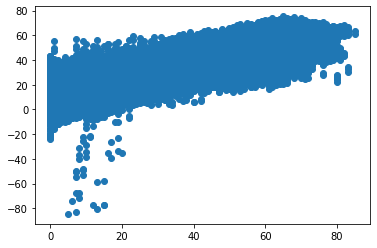

In [61]:
# Scatter plot of this multiple linear regression model

plt.scatter(ytest, y_predicted)

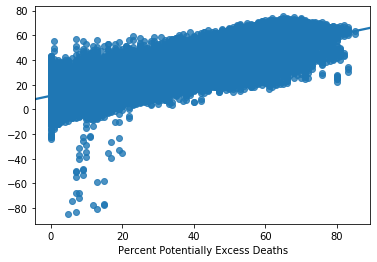

In [62]:
# Scatter plot of this multiple linear regression model with line

sns.regplot(ytest, y_predicted);

In [0]:
# Model #2 = Random Forest Regression

In [0]:
# Making and fitting model

model2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)
model2.fit(xtrain, ytrain)
ytest_pred = model2.predict(xtest)

In [65]:
# Predicted y values based on model

ytest_pred

array([35.59, 32.81, 33.  , ..., 60.78, 54.74, 62.05])

In [66]:
# This model has error of .5%

testerror2 = mean_absolute_error(ytest, ytest_pred)
testerror2

0.5587120726495727

In [67]:
# Testing model by choosing random x value

row2 = xtest.iloc[[2016]]
row2

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths
151776,2013,Cancer,Nevada,NV,9,0-49,2005 Fixed,All,268,1882482,262,11


In [68]:
# Corresponding y value for selected x value

ytest.iloc[[2016]]

151776    4
Name: Percent Potentially Excess Deaths, dtype: int64

In [69]:
# Corresponding y value for selected x value based on this random forest regression model

model2.predict(row2)

array([3.65])

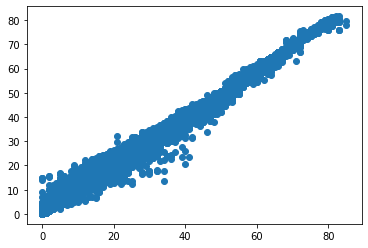

In [70]:
# Scatter plot of this random forest regression model

plt.scatter(ytest, ytest_pred)

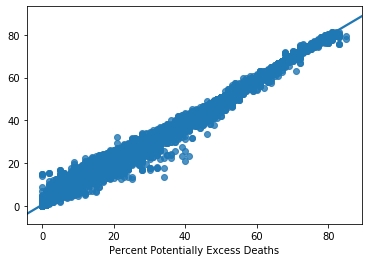

In [71]:
# Scatter plot of this random forest regression model with line

sns.regplot(ytest, ytest_pred);

In [0]:
rfrA = r2_score(ytest, ytest_pred)

In [73]:
rfrA

0.9964872747768191

In [74]:
df2.head(2)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756,3148377,451,305,40
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556,2379871,341,217,39


In [0]:
target = 'Percent Potentially Excess Deaths'
features2 = ['Percent Potentially Excess Deaths', 'Potentially Excess Deaths', 'Expected Deaths','Observed Deaths']
# extra = 'Percent Potentially Excess Deaths', 'Potentially Excess Deaths', 'Expected Deaths','Observed Deaths'

x2 = Train.drop(features2, axis=1)
y2 = Train[target]

xtrain2 = x2
ytrain2 = y2

#X_test
xtest2 = Test.drop(features2, axis=1)
ytest2 = Test[target]



In [76]:
x2.shape

(149760, 9)

In [77]:
y2.shape

(149760,)

In [78]:
xtest2.shape

(56160, 9)

In [79]:
xtest2.head(2)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Population
146156,2013,Cancer,Alabama,AL,4,0-64,2010 Fixed,All,4112556
146908,2013,Cancer,Alabama,AL,4,0-74,Floating,All,4531260


In [80]:
ytest2.shape

(56160,)

In [81]:
Test.shape

(56160, 13)

In [82]:
Test.head(2)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
146156,2013,Cancer,Alabama,AL,4,0-64,2010 Fixed,All,3396,4112556,2204,1192,35
146908,2013,Cancer,Alabama,AL,4,0-74,Floating,All,6383,4531260,4232,2151,33


In [83]:
encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain_encoded2 = encoder.fit_transform(xtrain2)
xtest_encoded2 = encoder.transform(xtest2)

xtrain_encoded2.head(2)

,Year,Cause of Death_Cancer,Cause of Death_Chronic Lower Respiratory Disease,Cause of Death_Heart Disease,Cause of Death_Stroke,Cause of Death_Unintentional Injury,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of\nColumbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,...,State FIPS Code_NV,State FIPS Code_NH,State FIPS Code_NJ,State FIPS Code_NM,State FIPS Code_NY,State FIPS Code_NC,State FIPS Code_ND,State FIPS Code_OH,State FIPS Code_OK,State FIPS Code_OR,State FIPS Code_PA,State FIPS Code_RI,State FIPS Code_SC,State FIPS Code_SD,State FIPS Code_TN,State FIPS Code_TX,State FIPS Code_0,State FIPS Code_UT,State FIPS Code_VT,State FIPS Code_VA,State FIPS Code_WA,State FIPS Code_WV,State FIPS Code_WI,State FIPS Code_WY,HHS Region,Age Range_0-49,Age Range_0-54,Age Range_0-59,Age Range_0-64,Age Range_0-69,Age Range_0-74,Age Range_0-79,Age Range_0-84,Benchmark_2005 Fixed,Benchmark_2010 Fixed,Benchmark_Floating,Locality_All,Locality_Metropolitan,Locality_Nonmetropolitan,Population
0,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,3148377
1,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2379871


In [0]:
linear2 = model.fit(xtrain_encoded2, ytrain2)

In [0]:
y_predictedA = model.predict(xtest_encoded2)

In [86]:
testerrorA = mean_absolute_error(ytest2, y_predictedA)
testerrorA

9.368487640981554

In [0]:
linear2r2 = r2_score(ytest2, y_predictedA)

In [95]:
linear2r2

0.6438610342930849

In [0]:
#rfr2

In [0]:
modelB = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)
modelB.fit(xtrain2, ytrain2)
ytest_predB = modelB.predict(xtest2)

In [90]:
ytest_predB

array([38.  , 32.64, 32.  , ..., 54.42, 54.01, 54.54])

In [91]:
testerrorB = mean_absolute_error(ytest2, ytest_predB)
testerrorB

4.976275106837607

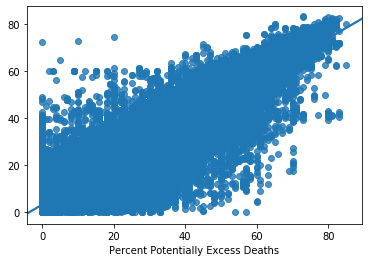

In [92]:
sns.regplot(ytest2, ytest_predB);

In [0]:
rfrB = r2_score(ytest2, ytest_predB)

In [94]:
rfrB

0.8517468341062042